# DSGE - Linearization Methods

# Exercise 1

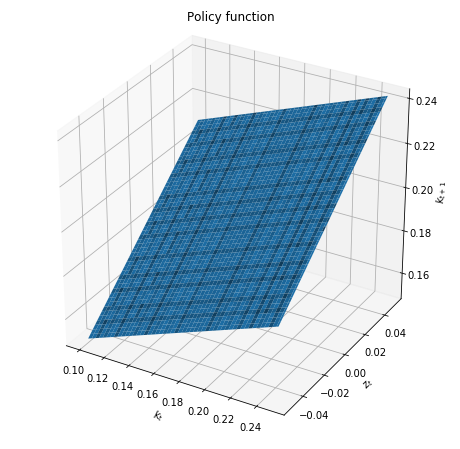

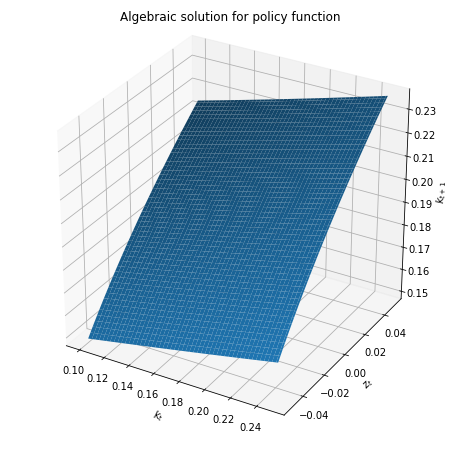

In [144]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

# define a function for linear approximation with the Uhligh's notation:
def get_linearcoef(k, z, α, β, ρ):
    # A is specific to the Brock-Mirman model
    A = α * β
    # Policy function
    K = A **(1/(1-α))
    
    F = (A * K**(α-1)) / (K**α - K)
    G = - (A * K**(α-1) * (α + K**(α-1))) / (K**α - K)
    H = (A*α * K**(2*(α-1))) / (K**α - K)
    L = - (A * K**(2*α-1)) / (K**α - K)
    M = (A*α * K**(2*(α-1))) / (K**α - K)
    N = ρ
    
    P = - (G + sqrt(G*G - 4*F*H)) / (2*F)
    Q = - (L*N + M) / (F*N + F*P + G)
    
    #print(" A=",round(A,4),"\n","K=",round(K,4),"\n","F=",round(F,4),"\n","G=",round(G,4),"\n","H=",round(H,4),"\n",
    #      "L=",round(L,4),"\n","M=",round(M,4),"\n","N=",round(N,4),"\n","P=",round(P,4),"\n","Q=",round(Q,4),"\n")
    return K + P*(k-K) + Q*z

# Initialize the parameters
α = .4
β = .98
ρ = .9

N = 100

# Create a grid of k
k_grid = np.linspace(.1,0.25,N)
# Create a grid of z
z_grid = np.linspace(-0.05, 0.05,N)
# Create the matric for the policy function
kp_mat = np.empty([N,N])


# Fit the value function at each combination of (k,z)
for i in range(N):
    for j in range(N):
        kp_mat[i,j] = get_linearcoef(k_grid[i], z_grid[j], α, β, ρ)

k,z = np.meshgrid(k_grid,z_grid)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(k, z, kp_mat)
ax.set_xlabel("$k_t$")
ax.set_ylabel("$z_t$")
ax.set_zlabel("$k_{t+1}$")
ax.set_title("Policy function\n")
plt.show()

# Algebraic solution
k1_alg = np.empty([N,N])
for i in range(N):
    for j in range(N):
        k1_alg[i,j] = α*β * np.exp(z_grid[j]) * k_grid[i]**α
        
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(k, z, k1_alg)
ax.set_xlabel(r"$k_t$")
ax.set_ylabel(r"$z_t$")
ax.set_zlabel(r"$k_{t+1}$")
ax.set_title("Algebraic solution for policy function\n")
plt.show()

'''
The algebraic solution should be well approximated by the linear approximation
for z and k values close to the steady state. 
When increasing the range of the k and z grid, one can notice that the 
shape of the linearly approximated policy function does not change, but
the shape of the true one does.
'''

## Exercise 2

-0.5376528147339814


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


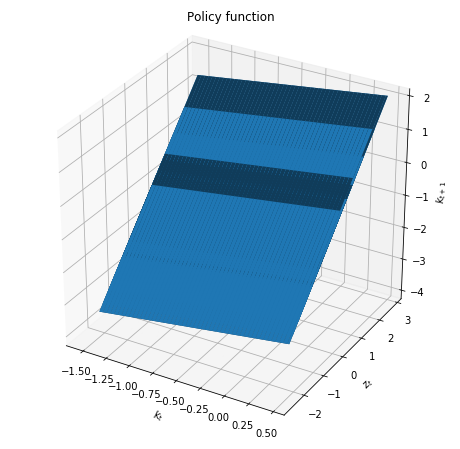

In [137]:

import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

α,β,N = 0.4,0.98,0.9

# Uhlig notation for derivatives of Gamma function
def F(α,Kpp,Kp,Zp):
    return np.exp(Zp)/(np.exp(Zp + α*Kp) - np.exp(Kpp))

def G(α,Kpp,Kp,K,Zp,Z):
    term1 = (α-1)*np.exp(Zp + (α-1)*Kp + Z + α*K) - α*np.exp(Zp + α*Kp) \
            / (np.exp(Zp + (α-1)*Kp + Z + α*K) - np.exp(Zp + α*Kp))
    term2 =  α*np.exp(Zp + α*Kp) \
            / (np.exp(Zp + α*Kp) - np.exp(Kpp))
    return term1 - term2

def H(α,Kpp,Kp,K,Zp,Z):
    return α*np.exp(Zp + (α-1)*Kp + Z + α*K) \
            / (np.exp(Zp + (α-1)*Kp + Z + α*K) - np.exp(Zp + α*Kp))

def L(α,Kpp,Kp,Zp):
    return 1 - np.exp(Zp + α*Kp) \
            / (np.exp(Zp + α*Kp) - np.exp(Kpp))

def M(α,Kpp,Kp,K,Zp,Z):
    return np.exp(Zp + (α-1)*Kp + Z + α*K) \
            / (np.exp(Zp + (α-1)*Kp + Z + α*K) - np.exp(Zp + α*Kp))

def P(α,Kpp,Kp,K,Zp,Z,G,F,H):
    num = - G(α,Kpp,Kp,K,Zp,Z) + (G(α,Kpp,Kp,K,Zp,Z)**2 - \
        4*F(α,Kpp,Kp,Zp)*H(α,Kpp,Kp,K,Zp,Z))**0.5
    den = 2*F(α,Kpp,Kp,Zp)
    return num/den

def Q(α,Kpp,Kp,K,Zp,Z,G,F,H):
    num = -(L(α,Kpp,Kp,Zp)*N + M(α,Kpp,Kp,K,Zp,Z))
    den = F(α,Kpp,Kp,Zp)*N + F(α,Kpp,Kp,Zp)*P(α,Kpp,Kp,K,Zp,Z,G,F,H) \
    + G(α,Kpp,Kp,K,Zp,Z) 
    return num/den

# def Φ(α,Kpp,Kp,K,Zp,Z,G,F,H,Kss):
#     return Kss + P(α,Kpp,Kp,K,Zp,Z,G,F,H)*(K - Kss) + Q(α,Kpp,Kp,K,Zp,Z,G,F,H)*Z

def Φ(K,Kss,Z,G,F,H,Q):
    Zss = 0
    return Kss + P(α,Kss,Kss,Kss,Zss,Zss,G,F,H)*(K - Kss) + Q(α,Kss,Kss,Kss,Zss,Zss,G,F,H)*Z


Kss = (1/α*β)**(α-1)
kss = np.log(Kss)
print(kss)

def truepol(K,Z):
    return np.log(α*β) + α*K + Z

np.random.seed(seed=25)
n = 100
# Build grid
zgrid = np.random.normal(loc=0,scale =1,size=n)
kgrid = np.linspace(kss-1,kss+1,n)

# Evaluate 3D function

X,Y = np.meshgrid(kgrid, zgrid)
Vals = np.empty_like(X)
trueVals = Vals
for i,item in enumerate(X):
    Vals[i] = Φ(item,kss,Y[i],G,F,H,Q)
    trueVals[i] = truepol(item,Y[i])


fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, trueVals)
ax.set_xlabel("$k_t$")
ax.set_ylabel("$z_t$")
ax.set_zlabel("$k_{t+1}$")
ax.set_title("Policy function\n")
plt.show()


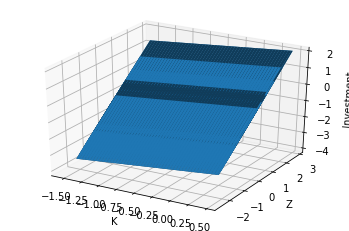

In [12]:
# Estimated policy function with perturbation method
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Vals)
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('Investment')
plt.show()

## Exercise 3

See pdf document.

## Exercise 4

Similar functional forms to Pset1 - Exercise 6

In [8]:
import numpy as np
from scipy.optimize import root

ξ = 1.5
β = .98
α = .40
a = .5
δ = .10
z = 0.0
τ = .05
γ = 2.5


def func_p6(x):
    k = x[0]
    r = x[1]
    c = x[2]
    w = x[3]
    T = x[4]
    l = x[5]

    
    E1 = (1-τ)*((w*l)+(r-δ)*k)+T - c
    E2 = β*(c**(-γ)*((r-δ)*(1-τ)+1)) - c**(-γ)
    E3 = c**(-γ)*w*(1-τ) - a*(1-l)**(-ξ)
    E4 = r - α*(k**(α-1))*(l**(1-α))
    E5 = w - k**(α)*(1-α)*(l**(-α))
    E6 = T -τ*(l*w+(r-δ)*k)
    
    return [E1, E2, E3, E4, E5, E6] 


sols = root(func_p6, np.ones(6)*.5)
print(sols.x)

k_ss, r_ss, c_ss, w_ss, T_ss, l_ss = sols.x

# Optimal output value
y_ss = k_ss**α * (l_ss*np.exp(z))**(1-α)

# Optimal investment value
invest_ss = y_ss - c_ss



[4.22522903 0.12148228 0.86070321 1.32795277 0.04303516 0.57979145]


## Exercise 5 : comparative statics at the steady state

In [13]:
from scipy import optimize
from autograd import jacobian
import numpy as np
from autograd import numpy as anp

params = 0.4,0.98,2.5,0.10,1.5,0.05,0.5,0.0
α,β,γ,δ,ξ,τ,a,Z = params

def system(X,*params):
    K,C,W,R,L,T = X
    α,β,γ,δ,ξ,τ,a,Z = params

    return [C - (1-τ)*(W*L + (R - δ)*K) - T, \
    1 - β*((R-δ)*(1-τ)+1), \
    a*(1-L)**(-ξ) - W*(1-τ)*C**(-γ), \
    R - α*K**(α-1)*L**(1-α), \
    W - (1-α)*K**α*L**(-α),\
    T - τ*(W*L + (R-δ)*K)]

def solution(params):
    solve = optimize.root(system,X0,method='hybr',args=(params))
    K,C,W,R,L,T = solve.x
    return  np.array([K,C,W,R,L,T])

X0 = [0.5,0.5,0.5,0.5,0.5,0.5]
params = α,β,γ,δ,ξ,τ,a,Z

K,C,W,R,L,T = solution(params)
print(K,C,W,R,L,T)

lss = L
kss = K

h = 0.0001
def differentiate(params,h):
    '''
    Creates 2 matrices : 
    matrix = matrix of variables at the ss without changes in the param
    matrixh = matrix of variables at the ss with param = param+h
    jacobian = (matrixh - matrix) / h (first order difference)
    '''
    matrix = np.empty([6,len(params)]) # number of var = rows ; number of parameters = columns
    ss = solution(params)
    matrix = np.array([ss,]*len(params)).transpose() # stack the x_ss into a matrix
    matrixh = np.empty_like(matrix)
    for i in range(len(params)):
        paramsh = np.array([params])
        paramsh[0,i] += h
        α,β,γ,δ,ξ,τ,a,Z = (paramsh[0,:])
        P = α,β,γ,δ,ξ,τ,a,Z
        matrixh[:,i] = solution(P)

    jacobian = (matrixh - matrix)/h
    return jacobian


'''
Dependent variables as columns ; Independent variables as rows. 
More generally, when doing the Jacobian, need to be able to multiply the Jacobian 
by the column vector of independent variables.
'''

# Call function
h = 0.001
jacobian = differentiate(params,h)
solutions = np.round(jacobian,4)
print("Parameters \t α \t β \t γ \t δ \t ξ \t τ \t a \t Z \n", 
      "K \t", solutions[0,:], "\n",
      "C \t", solutions[1,:], "\n",
      "W \t", solutions[2,:], "\n",
      "R \t", solutions[3,:], "\n",
      "L \t", solutions[4,:], "\n",
      "T \t", solutions[5,:], "\n")

4.225229024235122 0.8607032061856069 1.32795276781949 0.12148227712137488 0.5797914533199656 0.04303516030928035
Parameters 	 α 	 β 	 γ 	 δ 	 ξ 	 τ 	 a 	 Z 
 K 	 [ 26.0778  66.2433   0.1387 -47.8974  -0.8014  -2.3245  -1.8474   0.    ] 
 C 	 [ 2.0924  1.7471  0.0282 -3.491  -0.1633 -0.2345 -0.3763  0.    ] 
 W 	 [ 4.4152  8.0396 -0.     -7.2379  0.     -0.1649  0.      0.    ] 
 R 	 [-0.     -1.0949  0.      1.     -0.      0.0226  0.      0.    ] 
 L 	 [-0.7713  0.2706  0.019   1.3133 -0.11   -0.139  -0.2535  0.    ] 
 T 	 [ 0.1046  0.0874  0.0014 -0.1745 -0.0082  0.8487 -0.0188  0.    ] 



## Exercise 6: 
This work uses a modified version of Kirk's code that can be found in DSGExample_key

In [101]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Outputs are:
        GDP: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        i: investment
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # truncate labor if necessary
    if ell > 0.9999:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definintion values
    GDP = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha)*GDP/ell
    r = alpha*GDP/k
    T = tau*(w*ell + (r - delta)*k)
    c = (1-tau)*(w*ell + (r - delta)*k) + k + T - kp
    i = GDP - c
    u = (c**(1-gamma)-1)/(1-gamma) + a*(1-ell**(1-xi)-1)/(1-xi)

    return GDP, w, r, T, c, i, u


def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definitions for now and next period
    ell = Y
    if ell > 1:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    GDP, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    GDPp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    E1 = beta*(c**(-gamma)*((r-delta)*(1-tau) + 1)) - c**(-gamma)
    E2 = a*(1-ell)**(-xi) - w*(1-tau)*(c**(-gamma))

    
    return np.array([E1, E2])


In [102]:
import numpy as np
import matplotlib.pyplot as plt

# import the modules from LinApp
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

In [97]:
# set parameter values
alpha = .4
beta = .98
gamma = 2.5
delta = .1
a = .5
xi = 1.5
rho = .9
sigma = .01
tau = .05

# make parameter list to pass to functions
params = np.array([alpha, beta, gamma, delta, a, xi, rho, sigma, tau])

# set LinApp parameters
Zbar = np.array([0.])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [103]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
# find the steady state values for the definitions
Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = \
    Modeldefs(kbar, kbar, ellbar, 0., params)

# display all steady state values
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('Tbar:   ', Tbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

check SS:  [ 5.55111512e-15 -1.93178806e-14]
kbar:    4.225229026783602
ellbar:  0.5797914531670039
Ybar:    1.2832261088325518
wbar:    1.3279527683512744
rbar:    0.12148227712137918
Tbar:    0.04303516030770958
cbar:    0.8607032061541915
ibar:    0.42252290267836035
ubar:    1.1450783724036768


In [106]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
   

## Exercise 7: 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9
Simulation  10
Simulation  11


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in power


Simulation  12
Simulation  13
Simulation  14
Simulation  15
Simulation  16
Simulation  17
Simulation  18
Simulation  19
Simulation  20
Simulation  21
Simulation  22
Simulation  23
Simulation  24
Simulation  25
Simulation  26
Simulation  27
Simulation  28
Simulation  29
Simulation  30
Simulation  31
Simulation  32
Simulation  33
Simulation  34
Simulation  35
Simulation  36
Simulation  37
Simulation  38
Simulation  39
Simulation  40
Simulation  41
Simulation  42
Simulation  43
Simulation  44
Simulation  45
Simulation  46
Simulation  47
Simulation  48
Simulation  49
Simulation  50
Simulation  51
Simulation  52
Simulation  53
Simulation  54
Simulation  55
Simulation  56
Simulation  57
Simulation  58
Simulation  59
Simulation  60
Simulation  61
Simulation  62
Simulation  63
Simulation  64
Simulation  65
Simulation  66
Simulation  67
Simulation  68
Simulation  69
Simulation  70
Simulation  71
Simulation  72
Simulation  73
Simulation  74
Simulation  75
Simulation  76
Simulation  77
Simulation

Simulation  534
Simulation  535
Simulation  536
Simulation  537
Simulation  538
Simulation  539
Simulation  540
Simulation  541
Simulation  542
Simulation  543
Simulation  544
Simulation  545
Simulation  546
Simulation  547
Simulation  548
Simulation  549
Simulation  550
Simulation  551
Simulation  552
Simulation  553
Simulation  554
Simulation  555
Simulation  556
Simulation  557
Simulation  558
Simulation  559
Simulation  560
Simulation  561
Simulation  562
Simulation  563
Simulation  564
Simulation  565
Simulation  566
Simulation  567
Simulation  568
Simulation  569
Simulation  570
Simulation  571
Simulation  572
Simulation  573
Simulation  574
Simulation  575
Simulation  576
Simulation  577
Simulation  578
Simulation  579
Simulation  580
Simulation  581
Simulation  582
Simulation  583
Simulation  584
Simulation  585
Simulation  586
Simulation  587
Simulation  588
Simulation  589
Simulation  590
Simulation  591
Simulation  592
Simulation  593
Simulation  594
Simulation  595
Simulati

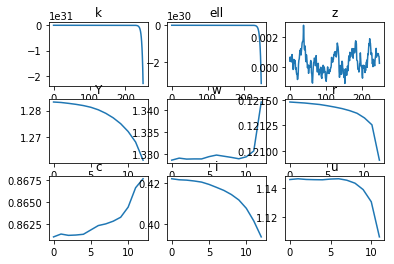

In [132]:
# set number of observations
nobs = 250
nsimu = 1000


#create matrix
KHist = np.zeros((nobs, nsimu))
EllHist = np.zeros((nobs, nsimu))
ZHist = np.zeros((nobs, nsimu))
YHist = np.zeros((nobs, nsimu))
WHist = np.zeros((nobs, nsimu))
RHist = np.zeros((nobs, nsimu))
CHist = np.zeros((nobs, nsimu))
IHist = np.zeros((nobs, nsimu))
UHist = np.zeros((nobs, nsimu))


for s in range(nsimu):
    print("Simulation ", s)

    # create a history of z's using equation (7)
    zhist = np.zeros(nobs+1)
    epshist = sigma*np.random.normal(0., 1., nobs+1)
    #epshist = np.zeros(nobs+1)
    #epshist[9] = sigma
    zhist[0] = epshist[0]
    for t in range(1,nobs+1):
        zhist[t] = rho*zhist[t-1] + epshist[t]

    # LinApp_SSL requires that Zhist be a 2-dimensional array
    Zhist = np.reshape(zhist, (nobs+1, 1))

    # Linapp_SSL also requires that starting values be arrays
    k0 = np.array([[kbar]])
    ell0 = np.array([[ellbar]])

    # create a history of k's and ell's using LinApp_SSL
    khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

    # create histories of remaining variables
    Yhist = np.zeros(nobs)
    whist = np.zeros(nobs)
    rhist = np.zeros(nobs)
    Thist = np.zeros(nobs)
    chist = np.zeros(nobs)
    ihist = np.zeros(nobs)
    uhist = np.zeros(nobs)
    for t in range(0,nobs):
        Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
            Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)

    # delete last observation
    khist = khist[0:nobs]
    zhist = zhist[0:nobs]
    ellhist = ellhist[0:nobs]
    
    #Put back into matrix
    KHist[:,s] = khist[:,0]
    EllHist[:,s] = ellhist[:,0]
    ZHist[:,s] = zhist
    YHist[:,s] = Yhist
    WHist[:,s] = whist
    RHist[:,s] = rhist
    CHist[:,s] = chist
    IHist[:,s] = ihist
    UHist[:,s] = uhist


# plot time series
time = range(0, nobs)





fig = plt.figure()
plt.subplot(3,3,1)
plt.plot(time, np.mean(KHist, axis=1), label='k')
plt.title('k')
plt.subplot(3,3,2)
plt.plot(time, np.mean(EllHist, axis=1), label='ell')
plt.title('ell')
plt.subplot(3,3,3)
plt.plot(time, np.mean(ZHist, axis=1), label='z')
plt.title('z')
plt.subplot(3,3,4)
plt.plot(time, np.mean(YHist, axis=1), label='Y')
plt.title('Y')
plt.subplot(3,3,5)
plt.plot(time, np.mean(WHist, axis=1), label='w')
plt.title('w')
plt.subplot(3,3,6)
plt.plot(time, np.mean(RHist, axis=1), label='r')
plt.title('r')
plt.subplot(3,3,7)
plt.plot(time, np.mean(CHist, axis=1), label='c')
plt.title('c')
plt.subplot(3,3,8)
plt.plot(time, np.mean(IHist, axis=1), label='i')
plt.title('i')
plt.subplot(3,3,9)
plt.plot(time, np.mean(UHist, axis=1), label='u')
plt.title('u')
plt.show()

## Exercise 8

Compute moments

## Exercise 9: Impulse response function

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


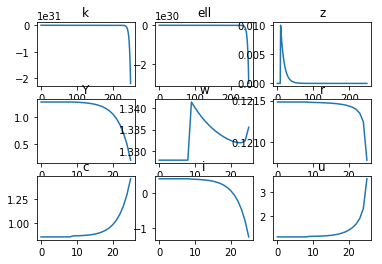

In [130]:
# set number of observations
nobs = 250

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
#epshist = sigma*np.random.normal(0., 1., nobs+1)
epshist = np.zeros(nobs+1)
epshist[9] = sigma
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = rho*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
ell0 = np.array([[ellbar]])

# create a history of k's and ell's using LinApp_SSL
khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
Thist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
ellhist = ellhist[0:nobs]

# plot time series
time = range(0, nobs)

fig = plt.figure()
plt.subplot(3,3,1)
plt.plot(time, khist, label='k')
plt.title('k')
plt.subplot(3,3,2)
plt.plot(time, ellhist, label='ell')
plt.title('ell')
plt.subplot(3,3,3)
plt.plot(time, zhist, label='z')
plt.title('z')
plt.subplot(3,3,4)
plt.plot(time, Yhist, label='Y')
plt.title('Y')
plt.subplot(3,3,5)
plt.plot(time, whist, label='w')
plt.title('w')
plt.subplot(3,3,6)
plt.plot(time, rhist, label='r')
plt.title('r')
plt.subplot(3,3,7)
plt.plot(time, chist, label='c')
plt.title('c')
plt.subplot(3,3,8)
plt.plot(time, ihist, label='i')
plt.title('i')
plt.subplot(3,3,9)
plt.plot(time, uhist, label='u')
plt.title('u')
plt.show()

## Exercise 6 : Personal version (still work in progress)

Version trying to use the sympy package to differentiate, but not successful so far.

In [88]:
import sympy as sy
import numpy as np
from sympy.utilities.lambdify import lambdify

params = .4,.98,2.5,.10,1.5,.05,.5,0.0,.9
α,β,γ,δ,ξ,τ,a,Z,N = params

kpp = sy.symbols('kpp')
kp = sy.symbols('kp')
k = sy.symbols('k')
lp = sy.symbols('lp')
l = sy.symbols('kpp')
lm = sy.symbols('lm')
zp = sy.symbols('zp')
z = sy.symbols('z')
a1,a2,a3,a4,a5,a6,a7,a8 =  sy.symbols('a1 a2 a3 a4 a5 a6 a7 a8')

def c(k, kp, l):
    return (1-τ)*(w(k, l, z)*l + (r(k, l, z) - δ)*k) + k + t(k, l, z) - kp

def r(k, l, z):
    return α*sy.Pow(k,(α-1))*sy.Pow(l,(1-α))*sy.exp((1-α)*z)

def w(k, l, z):
    return (1-α)*sy.Pow(k,α)*sy.Pow(l,(1-α))*sy.exp((1-α)*z)

def t(k, l, z):
    return τ*(w(k, l, z)*l + (r(k, l, z)-δ)*k)


def gamma1(kpp,lp, kp, l, k, lm,zp,z):
    return β*sy.Pow(c(kp, kpp, lp),-γ)*((r(kp, lp, zp)-δ)*(1-τ) + \
           1) - c(k, kp, l)

def gamma2(kpp,lp, kp, l, k, lm,zp,z):
    return a*sy.Pow((1-l),-ξ) - w(k, l, z)*(1-τ)*sy.Pow(c(k, kp, l),-γ)


def F(kpp,lp, kp, l, k, lm,zp,z):
    dkpp = sy.diff(gamma1,kpp)
    dlp =  sy.diff(gamma2,lp)
    return np.hstack(dkpp,dlp)

def G(kpp,lp, kp, l, k, lm,zp,z):
    dkp = sy.diff(gamma1,kp)
    dl =  sy.diff(gamma2,l)
    return np.hstack(dkp,dl)

def H(kpp,lp, kp, l, k, lm,zp,z):
    dk = sy.diff(gamma1,k)
    dlm =  sy.diff(gamma2,lm)
    return np.hstack(dk,dlm)

def L(kpp,lp, kp, l, k, lm,zp,z):
    sy.diff(gamma(kpp,lp, kp, l, k, lm,zp,z),zp)
    func = sy.diff((1-τ)*(w(a1, a2, a3)*a2 + (r(a1, a2, a3) - δ)*a1) + a1 + t(a1, a2, a3) - a4,a1)
    return func(kpp,lp, kp)

print(L(0,0,0,0,0,0,0,0))

def M(kpp,lp, kp, l, k, lm,zp,z):
    func =  sy.diff(gamma(a1,a2,a3,a4,a5,a6,a7,a8),a8)
    return func(kpp,lp, kp, l, k, lm,zp,z)


def P(kpp,lp, kp, l, k, lm,zp,z):
    num = - G(kpp,lp, kp, l, k, lm,zp,z) + (sy.Pow(G(kpp,lp, kp, l, k, lm,zp,z),2) - \
       4*F(kpp,lp, kp, l, k, lm,zp,z)*sy.Pow(H(kpp,lp, kp, l, k, lm,zp,z)),0.5)
    den = 2*F(kpp,lp, kp, l, k, lm,zp,z)
    return num/den

def Q(kpp,lp, kp, l, k, lm,zp,z):
    num = -(L(kpp,lp, kp, l, k, lm,zp,z)*N + M(kpp,lp, kp, l, k, lm,zp,z))
    den = F(kpp,lp, kp, l, k, lm,zp,z)*N + F(kpp,lp, kp, l, k, lm,zp,z)*P(kpp,lp, kp, l, k, lm,zp,z) + \
    G(kpp,lp, kp, l, k, lm,zp,z)
    return num/den



def Φ(X,Xss,z):
    zss = 0
    kss, lss = Xss
    k,l = X
    return X + (X-Xss)*P(kss,lss,kss,lss,kss,lss,zss,zss) \
+ Q(kss,lss,kss,lss,kss,lss,zss,zss)*z


Xss = np.vstack(np.array([kss,lss]))

np.random.seed(seed=25)
n = 100
# Build grid
zgrid = np.random.normal(loc=0,scale =1,size=n)
kgrid = np.linspace(kss-1,kss+1,n)
lgrid = np.zeros_like(kgrid)


# Evaluate 3D function

K,Z = np.meshgrid(kgrid, zgrid)
Vals = np.empty_like(K)
for i,item in enumerate(K):
    for j,itemj in enumerate(item):
        print(itemj.shape)
        X = np.vstack(np.array([itemj,0]))
        Vals[i,j] = Φ(X,Xss,Z[i,j])
        
        
# Plot 3D function
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(K,Z, Vals)
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('Investment')
plt.show()

ValueError: 
Since there are no variables in the expression
[-0.6*k**0.4*l**1.6*exp(0.6*z) -
1.0*k*(0.4*k**(-0.6)*l**0.6*exp(0.6*z) - 0.1) - k + kp +
0.98*(0.38*kp**(-0.6)*lp**0.6*exp(0.6*zp) +
0.905)*(0.6*kp**0.4*lp**1.6*exp(0.6*z) +
1.0*kp*(0.4*kp**(-0.6)*lp**0.6*exp(0.6*z) - 0.1) + kp - kpp)**(-2.5),
0.98*kp], it cannot be differentiated.

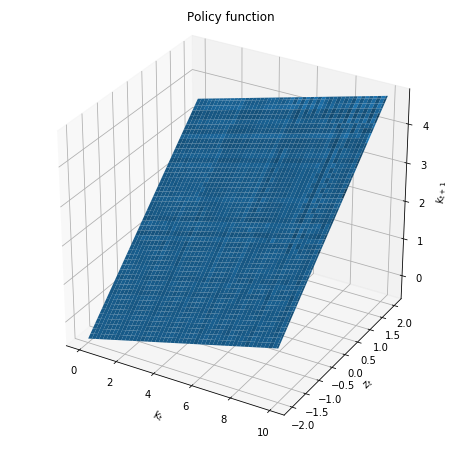

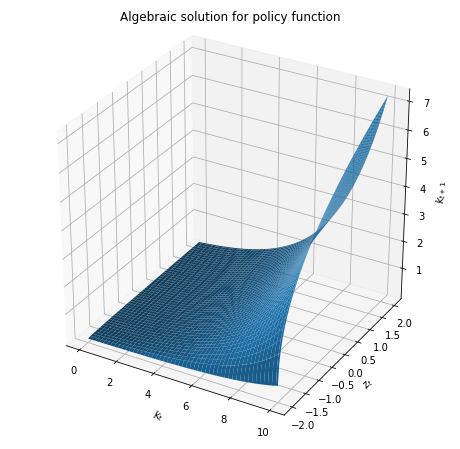

In [140]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

# define function for linear approximation
def linearcoeff(k, z, alpha, beta, rho):
    A = alpha * beta
    K = A **(1/(1-alpha))
    
    F = (A * K**(alpha-1)) / (K**alpha - K)
    G = - (A * K**(alpha-1) * (alpha + K**(alpha-1))) / (K**alpha - K)
    H = (A*alpha * K**(2*(alpha-1))) / (K**alpha - K)
    L = - (A * K**(2*alpha-1)) / (K**alpha - K)
    M = (A*alpha * K**(2*(alpha-1))) / (K**alpha - K)
    N = rho
    
    P = - (G + sqrt(G*G - 4*F*H)) / (2*F)
    Q = - (L*N + M) / (F*N + F*P + G)
    
    #print(" A=",round(A,4),"\n","K=",round(K,4),"\n","F=",round(F,4),"\n","G=",round(G,4),"\n","H=",round(H,4),"\n",
    #      "L=",round(L,4),"\n","M=",round(M,4),"\n","N=",round(N,4),"\n","P=",round(P,4),"\n","Q=",round(Q,4),"\n")
    return K + P*(k-K) + Q*z

alpha = .4
beta = .98
rho = .9

N = 100
k_grid = np.linspace(.01,10.,N)
z_grid = np.linspace(-2.,2.,N)
k1_mat = np.empty([N,N])

for i in range(N):
    for j in range(N):
        k1_mat[i,j] = linearcoeff(k_grid[i], z_grid[j], alpha, beta, rho)

k,z = np.meshgrid(k_grid,z_grid)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(k, z, k1_mat)
ax.set_xlabel(r"$k_t$")
ax.set_ylabel(r"$z_t$")
ax.set_zlabel(r"$k_{t+1}$")
ax.set_title("Policy function\n")
plt.show()

# Algebraic solution
k1_alg = np.empty([N,N])
for i in range(N):
    for j in range(N):
        k1_alg[i,j] = alpha*beta * np.exp(z_grid[j]) * k_grid[i]**alpha
        
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(k, z, k1_alg)
ax.set_xlabel(r"$k_t$")
ax.set_ylabel(r"$z_t$")
ax.set_zlabel(r"$k_{t+1}$")
ax.set_title("Algebraic solution for policy function\n")
plt.show()